In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import numpy as np
import os
from pathlib import Path

In [1]:
from pyteomics import mass as pymass
db = pymass.Unimod()
modslist = []
for p in range(len(db.mods)):
    for pp in db.mods[p]['specificity']:
        if db.mods[p]['record_id'] in [35, 53, 129, 130, 205, 206, 275, 288, 318, 319, 335, 340, 342, 344, 345, 348, 349, 350, 351, 352, 354, 
        359, 360, 368, 378, 392, 401, 421, 425, 534, 540, 548, 569, 720, 721, 743, 743, 860, 936, 936, 937, 949, 1384, 1914, 1915, 1916, 1917, 1918, 
        1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929]:
            t = db.mods[p]['title']
            t = t.replace("[",":").replace("]",":")
            string = "[" + str(db.mods[p]['record_id']) + "]" + t + "[" + pp['site'] + "]"
            modslist.append(string)
modslist.append('[35]oxidation[M]')
modslist

['[35]Oxidation[T]',
 '[35]Oxidation[E]',
 '[35]Oxidation[S]',
 '[35]Oxidation[Q]',
 '[35]Oxidation[L]',
 '[35]Oxidation[I]',
 '[35]Oxidation[U]',
 '[35]Oxidation[G]',
 '[35]Oxidation[W]',
 '[35]Oxidation[C]',
 '[35]Oxidation[H]',
 '[35]Oxidation[V]',
 '[35]Oxidation[R]',
 '[35]Oxidation[M]',
 '[35]Oxidation[Y]',
 '[35]Oxidation[F]',
 '[35]Oxidation[P]',
 '[35]Oxidation[N]',
 '[35]Oxidation[K]',
 '[35]Oxidation[D]',
 '[53]HNE[K]',
 '[53]HNE[H]',
 '[53]HNE[C]',
 '[53]HNE[A]',
 '[53]HNE[L]',
 '[359]Pro->pyro-Glu[P]',
 '[348]His->Asn[H]',
 '[349]His->Asp[H]',
 '[350]Trp->Hydroxykynurenin[W]',
 '[368]Cys->Dha[C]',
 '[344]Arg->GluSA[R]',
 '[345]Trioxidation[Y]',
 '[345]Trioxidation[W]',
 '[345]Trioxidation[C]',
 '[345]Trioxidation[F]',
 '[354]Nitro[Y]',
 '[354]Nitro[W]',
 '[354]Nitro[F]',
 '[351]Trp->Kynurenin[W]',
 '[352]Lys->Allysine[K]',
 '[129]Iodo[H]',
 '[129]Iodo[Y]',
 '[130]Diiodo[Y]',
 '[130]Diiodo[H]',
 '[360]Pro->Pyrrolidinone[P]',
 '[205]Delta:H(6)C(6)O(1)[K]',
 '[206]Delta:H(4)C

In [4]:
def make_mods_file(inputpath):
    filename = inputpath.split("/")[-1]
    p = Path(inputpath)
    os.chdir('/home/robbe/ionbot/countsfiles')
    mods = pd.read_csv(p / 'ionbot.modifications.csv')
    mods = mods['unexpected_modification']
    modsbool = mods.isin(modslist)
    mods = mods[modsbool]
    counts = mods.value_counts().rename_axis('modification')
    return counts.to_csv("{}_oxmods_counts.csv".format(filename))


In [5]:
make_mods_file('/home/robbe/ionbot/PXD006657/ionbot_files/null0c90c1648c327af99c81541bca7bfbb7817e44197d8f84979708edc9415cd2b6-A0288_klc_20140708m_HEPG2_Redoxome_H2O2_BR3_C6')

In [6]:
modlist = pd.read_csv('/home/robbe/ionbot/countsfiles/null0c90c1648c327af99c81541bca7bfbb7817e44197d8f84979708edc9415cd2b6-A0288_klc_20140708m_HEPG2_Redoxome_H2O2_BR3_C6_oxmods_counts.csv')
modlist


,modification,unexpected_modification
0,[35]oxidation[M],567
1,[35]Oxidation[G],13
2,[425]Dioxidation[W],11
3,[35]Oxidation[I],10
4,[368]Cys->Dha[C],5
5,[35]Oxidation[N],4
6,[425]Dioxidation[M],3
7,[53]HNE[A],2
8,[743]4-ONE+Delta:H(-2)O(-1)[H],1
9,[1918]Carbonyl[I],1


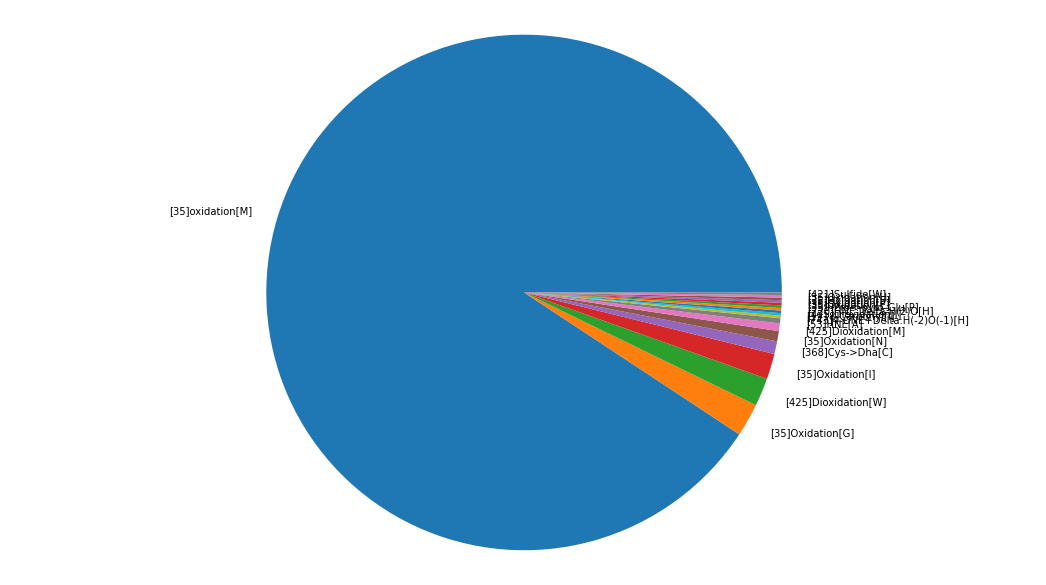

In [7]:
fig1, ax1 = plt.subplots()
ax1.pie(modlist['unexpected_modification'], labels = modlist['modification'])
ax1.axis('equal')
fig1.set_size_inches(18.5, 10.5)
fig1.show()

In [8]:
modslistwithoutmOx = modlist.drop(labels=0)
modslistwithoutmOx

,modification,unexpected_modification
1,[35]Oxidation[G],13
2,[425]Dioxidation[W],11
3,[35]Oxidation[I],10
4,[368]Cys->Dha[C],5
5,[35]Oxidation[N],4
6,[425]Dioxidation[M],3
7,[53]HNE[A],2
8,[743]4-ONE+Delta:H(-2)O(-1)[H],1
9,[1918]Carbonyl[I],1
10,[425]Dioxidation[I],1


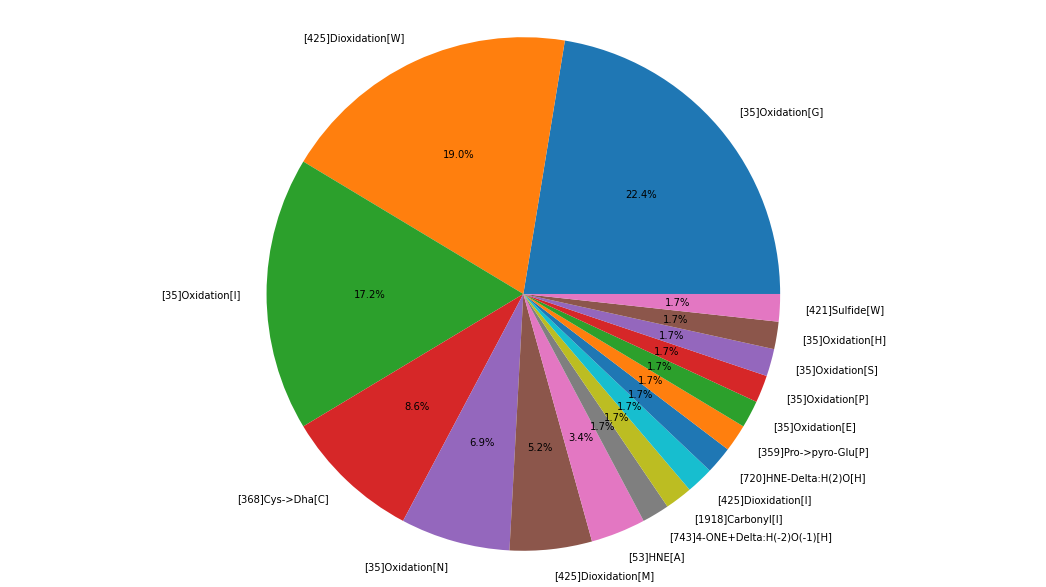

In [9]:
fig1, ax1 = plt.subplots()
ax1.pie(modslistwithoutmOx['unexpected_modification'], labels = modslistwithoutmOx['modification'], autopct = '%1.1f%%')
ax1.axis('equal')
fig1.set_size_inches(18.5, 10.5)
fig1.show()

In [10]:
modlist['Amino acid modified'] = modlist['modification'].str[-2]
modlist


,modification,unexpected_modification,Amino acid modified
0,[35]oxidation[M],567,M
1,[35]Oxidation[G],13,G
2,[425]Dioxidation[W],11,W
3,[35]Oxidation[I],10,I
4,[368]Cys->Dha[C],5,C
5,[35]Oxidation[N],4,N
6,[425]Dioxidation[M],3,M
7,[53]HNE[A],2,A
8,[743]4-ONE+Delta:H(-2)O(-1)[H],1,H
9,[1918]Carbonyl[I],1,I


In [11]:
modifiedAA_counts = modlist.groupby(['Amino acid modified']).sum().reset_index()
modifiedAA_counts

,Amino acid modified,unexpected_modification
0,A,2
1,C,5
2,E,1
3,G,13
4,H,3
5,I,12
6,M,570
7,N,4
8,P,2
9,S,1


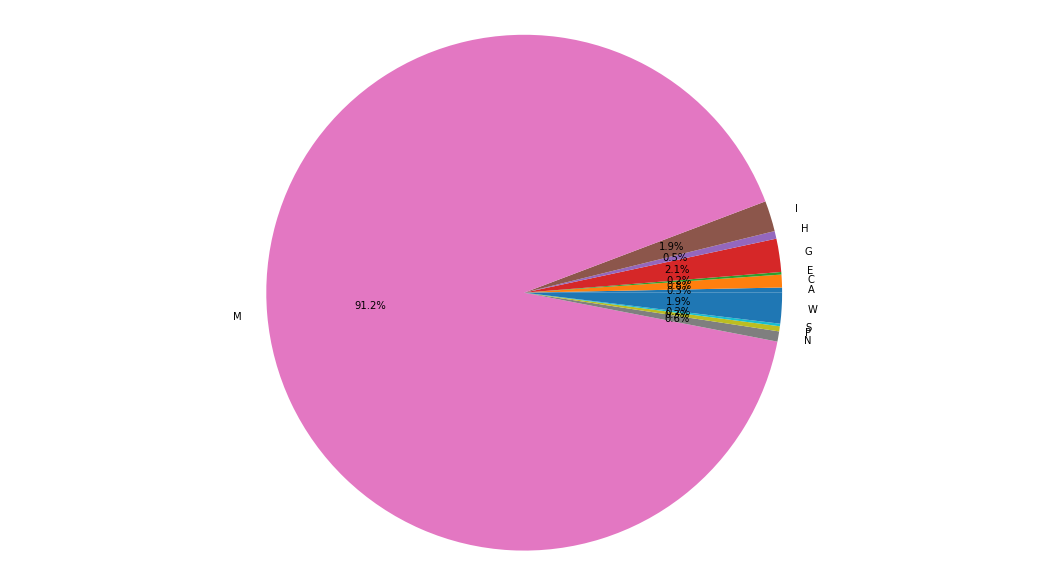

In [12]:
fig1, ax1 = plt.subplots()
ax1.pie(modifiedAA_counts['unexpected_modification'], labels = modifiedAA_counts['Amino acid modified'], autopct='%1.1f%%')
ax1.axis('equal')
fig1.set_size_inches(18.5, 10.5)
fig1.show()

In [13]:
modslistwithoutmOx['Amino acid modified'] = modslistwithoutmOx['modification'].str[-2]
modslistwithoutmOx

,modification,unexpected_modification,Amino acid modified
1,[35]Oxidation[G],13,G
2,[425]Dioxidation[W],11,W
3,[35]Oxidation[I],10,I
4,[368]Cys->Dha[C],5,C
5,[35]Oxidation[N],4,N
6,[425]Dioxidation[M],3,M
7,[53]HNE[A],2,A
8,[743]4-ONE+Delta:H(-2)O(-1)[H],1,H
9,[1918]Carbonyl[I],1,I
10,[425]Dioxidation[I],1,I


In [14]:
modifiedAA_countsnoM = modslistwithoutmOx.groupby(['Amino acid modified']).sum().reset_index()
modifiedAA_countsnoM

,Amino acid modified,unexpected_modification
0,A,2
1,C,5
2,E,1
3,G,13
4,H,3
5,I,12
6,M,3
7,N,4
8,P,2
9,S,1


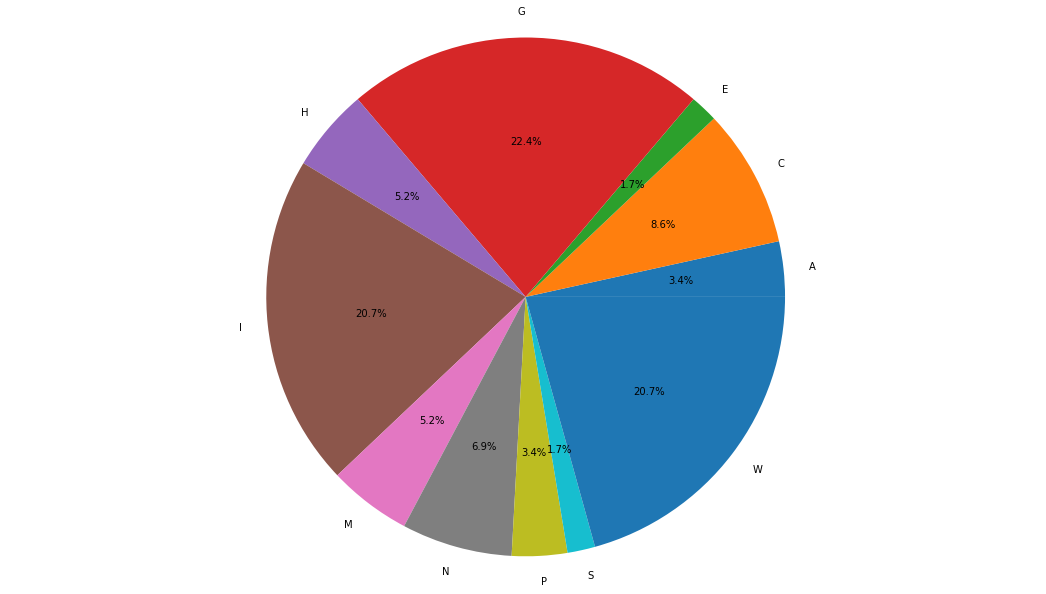

In [15]:
fig1, ax1 = plt.subplots()
ax1.pie(modifiedAA_countsnoM['unexpected_modification'], labels = modifiedAA_countsnoM['Amino acid modified'], autopct='%1.1f%%')
ax1.axis('equal')
fig1.set_size_inches(18.5, 10.5)
fig1.show()

In [16]:
ox35 = modlist[modlist.modification.str.contains(pat = "[35]Oxidation", regex=False)]
ox35

,modification,unexpected_modification,Amino acid modified
1,[35]Oxidation[G],13,G
3,[35]Oxidation[I],10,I
5,[35]Oxidation[N],4,N
13,[35]Oxidation[E],1,E
14,[35]Oxidation[P],1,P
15,[35]Oxidation[S],1,S
16,[35]Oxidation[H],1,H


In [17]:
PSMs = pd.read_csv("/home/robbe/ionbot/PXD006657/ionbot_files/null0c90c1648c327af99c81541bca7bfbb7817e44197d8f84979708edc9415cd2b6-A0288_klc_20140708m_HEPG2_Redoxome_H2O2_BR3_C6/ionbot.first.csv")
PSMs.head()

,ionbot_match_id,spectrum_title,scan,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,corrected_retention_time,unexpected_modification,database,psm_score,q-value,PEP,proteins
0,0_4435_1,controllerType=0 controllerNumber=1 scan=10004,10004,null0c90c1648c327af99c81541bca7bfbb7817e44197d...,1798.75942,17188.0458,2165.46492,3,IHEGCEEPATHNAIAK,IHEGCEEPATHNAIAK,6|[21]Phospho[E],6|79.9663,2165.46492,[21]Phospho[E],T,1.50188,0.00094,0.00009,CLH1_HUMAN((866-882))((Q00610))
1,0_4436_2,controllerType=0 controllerNumber=1 scan=10005,10005,null0c90c1648c327af99c81541bca7bfbb7817e44197d...,1718.68905,17188.0458,2165.54646,3,IHEGCEEPATHNAIAK,IHEGCEEPATHNAIAK,NaN,0|,2318.81466,NaN,T,1.38379,0.00094,0.00016,CLH1_HUMAN((866-882))((Q00610))
2,0_4461_4,controllerType=0 controllerNumber=1 scan=10034,10034,null0c90c1648c327af99c81541bca7bfbb7817e44197d...,744.43827,7444.3813,2168.76558,2,TIAEIAK,TIAEIAK,NaN,0|,2168.76558,NaN,T,0.23051,0.00341,0.05291,NONO_HUMAN((120-127))((Q15233))||PSPC1_HUMAN((...
3,0_4487_2,controllerType=0 controllerNumber=1 scan=10063,10063,null0c90c1648c327af99c81541bca7bfbb7817e44197d...,1044.54685,10445.4512,2171.67348,2,QIETIGQEK,QIETIGQEK,NaN,0|,2171.67348,NaN,T,0.69151,0.00094,0.00528,K2C8_HUMAN((150-159))((P05787))||sp|Q9H552((16...
4,0_4497_1,controllerType=0 controllerNumber=1 scan=10075,10075,null0c90c1648c327af99c81541bca7bfbb7817e44197d...,1788.87862,15307.3565,2173.04394,3,KPIKPCCACPETK,KPIKPCCACPETK,7|[4]carbamidomethyl[C]|9|[4]carbamidomethyl[C...,7|57.0215|9|57.0215|5|258.1150,2173.04394,[357]probiotinhydrazide[P],T,0.63020,0.00094,0.00720,COX17_HUMAN((18-31))((Q14061))


In [18]:
modfile = pd.read_csv('/home/robbe/ionbot/PXD006657/ionbot_files/null0c90c1648c327af99c81541bca7bfbb7817e44197d8f84979708edc9415cd2b6-A0288_klc_20140708m_HEPG2_Redoxome_H2O2_BR3_C6/ionbot.modifications.csv')
modfile.head()

,protein,uniprot_id,unexpected_modification,position,ionbot_match_id,#PSMs
0,1433B_HUMAN,P31946,[35]oxidation[M],162,0_717_3,1
1,1433T_HUMAN,P27348,[4]carbamidomethyl[C],94,0_16810_2,1
2,1433T_HUMAN,P27348,[35]oxidation[M],160,0_717_3,1
3,1433Z_HUMAN,P63104,[35]oxidation[M],160,0_717_3,1
4,5MP1_HUMAN,Q9Y6E2,[999943]DiART6plex115[N-TERM],93,0_9260_1,1


In [19]:
n_of_PSMs = PSMs.shape[0]

In [20]:
import re 
matches = modslist
safe_matches = [re.escape(m) for m in matches]

In [21]:
oxidizedPSMs = PSMs[PSMs['modifications'].str.contains('|'.join(safe_matches), na=False)]
oxidizedPSMs.head()

,ionbot_match_id,spectrum_title,scan,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,corrected_retention_time,unexpected_modification,database,psm_score,q-value,PEP,proteins
23,0_4734_2,controllerType=0 controllerNumber=1 scan=10333,10333,null0c90c1648c327af99c81541bca7bfbb7817e44197d...,1255.61675,12556.1179,2198.02548,2,MKETAEAYIGK,MKETAEAYIGK,1|[35]oxidation[M],1|15.9949,2198.02548,NaN,T,1.13303,0.00094,0.00056,BIP_HUMAN((153-164))((P11021))
54,0_5136_1,controllerType=0 controllerNumber=1 scan=10774,10774,null0c90c1648c327af99c81541bca7bfbb7817e44197d...,820.43296,8204.0002,2241.13050,2,DDAMIIK,DDAMIIK,4|[35]oxidation[M],4|15.9949,2241.13050,NaN,T,0.28031,0.00341,0.04144,CH60_HUMAN((353-360))((P10809))
55,0_5164_3,controllerType=0 controllerNumber=1 scan=10805,10805,null0c90c1648c327af99c81541bca7bfbb7817e44197d...,1254.63085,12546.2777,2244.18984,3,VKYETEIAMR,VKYETEIAMR,9|[35]oxidation[M],9|15.9949,2244.18984,NaN,T,0.60726,0.00094,0.00808,K1C18_HUMAN((166-176))((P05783))||sp|P05784((1...
62,0_5237_1,controllerType=0 controllerNumber=1 scan=10883,10883,null0c90c1648c327af99c81541bca7bfbb7817e44197d...,1970.82419,16546.7491,2251.44936,2,AMTGSTPCSSMSNHTK,AMTGSTPCSSMSNHTK,11|[35]oxidation[M]|8|[119]IBTP[C],11|15.9949|8|316.1381,2251.44936,[119]IBTP[C],T,0.32314,0.00240,0.03354,STK38_HUMAN((2-18))((Q15208))
70,0_5322_1,controllerType=0 controllerNumber=1 scan=10976,10976,null0c90c1648c327af99c81541bca7bfbb7817e44197d...,1153.51706,11535.1856,2260.32348,2,DAGMQIQGYR,DAGMQIQGYR,4|[35]oxidation[M],4|15.9949,2260.32348,NaN,T,0.37577,0.00166,0.02582,AATM_HUMAN((171-181))((P00505))


In [22]:
n_of_oxPSMs = oxidizedPSMs.shape[0]

In [23]:
print("The ratio of PSMs that have an oxidative modification is {:.2f}".format(n_of_oxPSMs/n_of_PSMs))

The ratio of PSMs that have an oxidative modification is 0.16


In [34]:
oxidizedPSMs['deltamass'] = oxidizedPSMs['modifications_delta'].str.split("|")
oxidizedPSMs['deltamass'] = oxidizedPSMs['deltamass'].str[1::2]
explodedoxPSMs = oxidizedPSMs.explode('deltamass')
deltamasscounts = explodedoxPSMs['deltamass'].value_counts().rename_axis('deltamass').reset_index(name='counts')
deltamasscountsnomox = deltamasscounts.drop(0)
deltamasscountsnomox['deltamass'] = deltamasscountsnomox['deltamass'].astype(float)
sorted = deltamasscountsnomox.sort_values('deltamass')

/tmp/ipykernel_642372/1818487923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oxidizedPSMs['deltamass'] = oxidizedPSMs['modifications_delta'].str.split("|")
/tmp/ipykernel_642372/1818487923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oxidizedPSMs['deltamass'] = oxidizedPSMs['deltamass'].str[1::2]


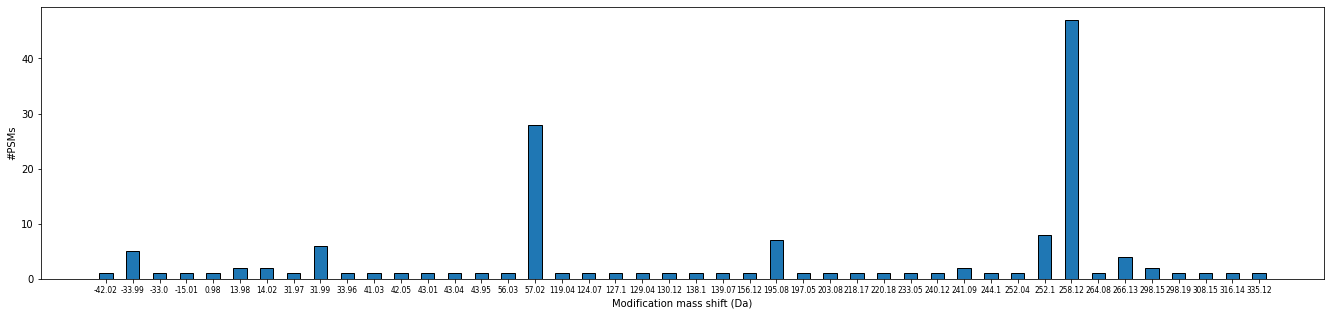

In [33]:
fig = plt.figure(figsize=(23,5))
plt.bar(x = sorted['deltamass'].astype(float).round(decimals = 2).astype(str), height = sorted['counts'], width=0.5, edgecolor = 'k', align = 'center')
plt.ylabel("#PSMs")
plt.xlabel("Modification mass shift (Da)")
plt.xticks(fontsize = 7.5)
plt.show()